In [155]:
import torch
import numpy as np 
import os
import sys
import numba as nb
import matplotlib.pyplot as plt
import time
from mpl_toolkits import mplot3d

from sklearn.datasets import make_swiss_roll, make_moons, make_circles
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import ot

os.chdir('/home/baly/projects/linear_opt')

#from lib.library import *
from lib.lib_lopt import *
#from lib.sliced_opt import *
#from lib.lib_shape import *


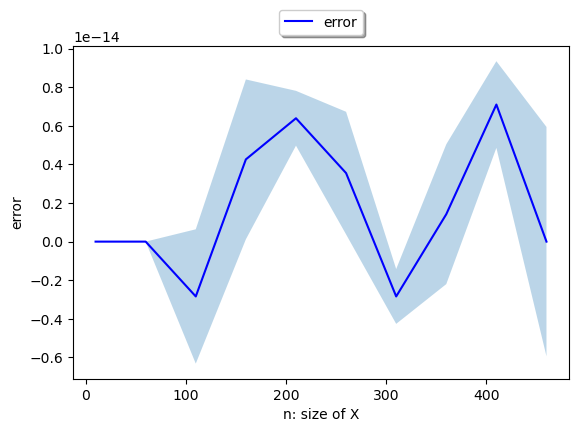

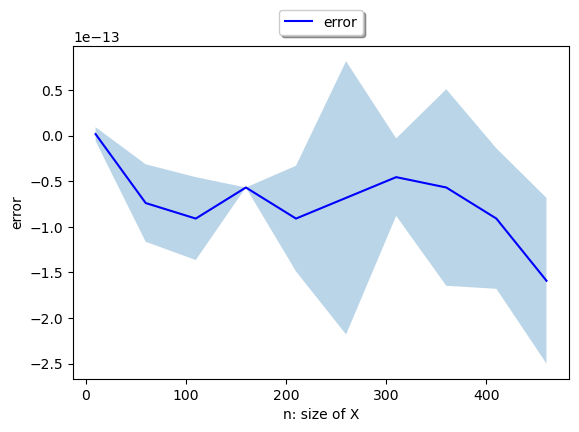

In [99]:
# test accuracy
n=5
m=5
Xi=np.array([2.0,3.0,4.0])
X0=np.array([0.0,1.0,2.0])
Pi=np.array([1/6,1/3,1/2])
P0=np.array([1/6,1/3,1/2])
Lambda=10.0
#cost,plan,penualty=opt_lp(X0,Xi,P0,Pi,Lambda,numItermax=100000)

#Vi,P0_T,index_i=linear_embedding(Xi,X0,Pi,P0,Lambda)
#norm,penualty1=vector_norm(Vi,P0_T,P0,Lambda)

Lambda=20
step_size=50
k=5
n_list=np.array(range(10,500,step_size))
opt_cost1=np.zeros((n_list.shape[0],k))
opt_cost2=np.zeros((n_list.shape[0],k))

for i in range(n_list.shape[0]):
    n=n_list[i]
    for k_p in range(k):
        X0=np.random.uniform(-20,20,(n,2))+15
        Xi=np.random.uniform(-20,20,(n,2))+0
        Xj=np.random.uniform(-20,20,(n,2))+30
        P0=np.ones(n)/n
        Pi=np.ones(n)/n
        Pj=np.ones(n)/n
        cost1,plan1,penualty1=opt_lp(X0,Xi,P0,Pi,Lambda,numItermax=200000)
        opt_cost1[i,k_p]=cost1+penualty1
        Ui,Pi_hat,mass_P0,mass_Pi=lopt_embedding(X0,Xi,P0,Pi,Lambda)
        cost2,penualty2=vector_norm_penualty(Ui,Pi_hat,mass_P0+mass_Pi,Lambda)
        
        opt_cost2[i,k_p]=cost2+penualty2

#        Vi,P0_Ti=linear_embedding(Xi,X0,Pi,P0,Lambda)
#        Vj,P0_Tj=linear_embedding(Xj,X0,Pj,P0,Lambda)
#        Vij,P0_Tij=vector_plus(Vi,-Vj,P0_Ti,P0_Tj)
#        cost2,penualty2=vector_norm(Vij,P0_Tij,1,Lambda)
#        opt_cost2[i,k_p]=cost2+penualty2
        # if cost2+penualty2<cost1+penualty1-0.00001:
            #     print('error')
            #     print('cost2',cost2)
    #     print('cost1',cost1)
    #     print('penualty1',penualty1)
    #     print('penualty2',penualty2)
    #     break



fig = plt.figure()
ax = plt.subplot(111)
error=opt_cost2-opt_cost1
error_mean=error.mean(1)
error_std=error.std(1)

plt.plot(n_list,error_mean,'-',c='blue',label='error')
plt.fill_between(n_list,error_mean-1*error_std,error_mean+1*error_std,alpha=0.3)

plt.xlabel("n: size of X")
plt.ylabel("error")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.13),
          fancybox=True, shadow=True, ncol=3)
#plt.savefig('experiment/test/results/accuracy_error'+str(Lambda)+'.png',format="png",dpi=800,bbox_inches='tight')
plt.show()



for i in range(n_list.shape[0]):
    n=n_list[i]
    mass=(n-5)/n
    for k_p in range(k):
        X0=np.random.uniform(-20,20,(n,2))+15
        Xi=np.random.uniform(-20,20,(n,2))+0
        Xj=np.random.uniform(-20,20,(n,2))+30
        P0=np.ones(n)/n
        Pi=np.ones(n)/n
        Pj=np.ones(n)/n
#        print('start')
        cost1,plan1=opt_pr(X0,Xi,P0,Pi,mass,numItermax=200000)
#        print('end')
        opt_cost1[i,k_p]=cost1
        Ui,Pi_hat=lopt_embedding_pr(X0,Xi,P0,Pi,mass)
        cost2=vector_norm(Ui,Pi_hat)
        opt_cost2[i,k_p]=cost2

#        Vi,P0_Ti=linear_embedding(Xi,X0,Pi,P0,Lambda)
#        Vj,P0_Tj=linear_embedding(Xj,X0,Pj,P0,Lambda)
#        Vij,P0_Tij=vector_plus(Vi,-Vj,P0_Ti,P0_Tj)
#        cost2,penualty2=vector_norm(Vij,P0_Tij,1,Lambda)
#        opt_cost2[i,k_p]=cost2+penualty2
        # if cost2+penualty2<cost1+penualty1-0.00001:
            #     print('error')
            #     print('cost2',cost2)
    #     print('cost1',cost1)
    #     print('penualty1',penualty1)
    #     print('penualty2',penualty2)
    #     break



fig = plt.figure()
ax = plt.subplot(111)
error=opt_cost2-opt_cost1
error_mean=error.mean(1)
error_std=error.std(1)

plt.plot(n_list,error_mean,'-',c='blue',label='error')
plt.fill_between(n_list,error_mean-1*error_std,error_mean+1*error_std,alpha=0.3)

plt.xlabel("n: size of X")
plt.ylabel("error")
box = ax.get_position()
ax.set_position([box.x0, box.y0 + box.height * 0.1,box.width, box.height * 0.9])
plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.13),
          fancybox=True, shadow=True, ncol=3)
#plt.savefig('experiment/test/results/accuracy_error'+str(Lambda)+'.png',format="png",dpi=800,bbox_inches='tight')
plt.show()

# cost_list={}
# cost_list['cost_v2_list']=cost_v2_list
# cost_list['cost_v2a_list']=cost_v2a_list 
# cost_list['cost_pr_list']=cost_pr_list
# cost_list['cost_lp_list']=cost_lp_list

# torch.save(cost_list,'experiment/test/results/accuracy_list'+str(Lambda)+'.pt')

    

In [ ]:

n_list=range(2000,6000,500)
time_list1=[[],[]]
time_list2=[[],[]]
Lambda_list=[5,25.0]


for n in n_list:
    Xi=np.random.uniform(-20,20,(n,2))+0
    Xj=np.random.uniform(-20,20,(n,2))+30
    P0=np.ones(n)/n
    Pi=np.ones(n)/n
    Pj=np.ones(n)/n
    for i in range(2):
#        print('start')
        Lambda=Lambda_list[i]
        start_time=time.time()
        opt_lp(Xi,Xj,Pi,Pj,Lambda,numItermax=200000,numberThreds=1)
        end_time=time.time()
        time_list1[i].append(end_time-start_time)
    
    
        start_time=time.time()
        opt_lp(Xi,Xj,Pi,Pj,Lambda,numItermax=200000,numberThreds=10)
        end_time=time.time()
        time_list2[i].append(end_time-start_time)
    

time_list={} 
time_list['1']=time_list1
time_list['2']=time_list2

torch.save(time_list,'experiment/performance/time_list.pt')

fig = plt.figure()
ax = plt.subplot(111)

for i in range(2):
    plt.semilogy(n_list,time_list1[i],label='numberThreds=1 $\lambda=$'+str(Lambda_list[i]))
    plt.semilogy(n_list,time_list2[i],label='numberThreds=1 $\lambda=$'+str(Lambda_list[i]))

plt.legend(loc='upper center',bbox_to_anchor=(0.5, 1.23),
          fancybox=True, shadow=True, ncol=3)
plt.xlabel('n: size of X')
plt.ylabel("wall time")
#plt.savefig('experiment/test/results/time_numba.png',format='png',dpi=800,bbox_inches='tight')
#plt.title('wall-clock time with accelaration')
plt.show()
    




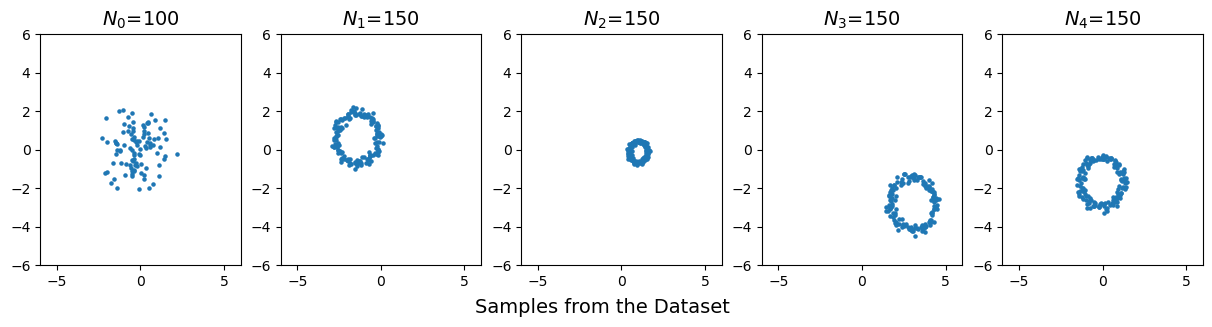

In [119]:
# generate data
data_path='experiment/geodesic/data'
M=100 # Number of data samples
X=list()
N=100
X0=np.random.randn(N,2)
X.append(X0)
for i in range(1,M):
    data,y=make_circles(n_samples=int(50*np.random.rand()+50),noise=.1,factor=.95)
    data,y=make_circles(n_samples=int(N+50),noise=.1,factor=.95)
    data=(np.random.rand()+.5)*data+2*np.random.randn(1,2)
    X.append(data)

k=5
fig,ax=plt.subplots(1,k,figsize=(k*3,3))
for i in range(k):
    ax[i].scatter(X[i][:,0],X[i][:,1],s=5)
    ax[i].set_title(r'$N_%d$=%d'%(i,X[i].shape[0]),fontsize=14)
    ax[i].set_xlim(-6,6)
    ax[i].set_ylim(-6,6)
fig.text(0.5, -0.05, 'Samples from the Dataset', ha='center',fontsize=14)
plt.show()

data={}
data['X_0']=X
torch.save(data,data_path+'/data.pt')

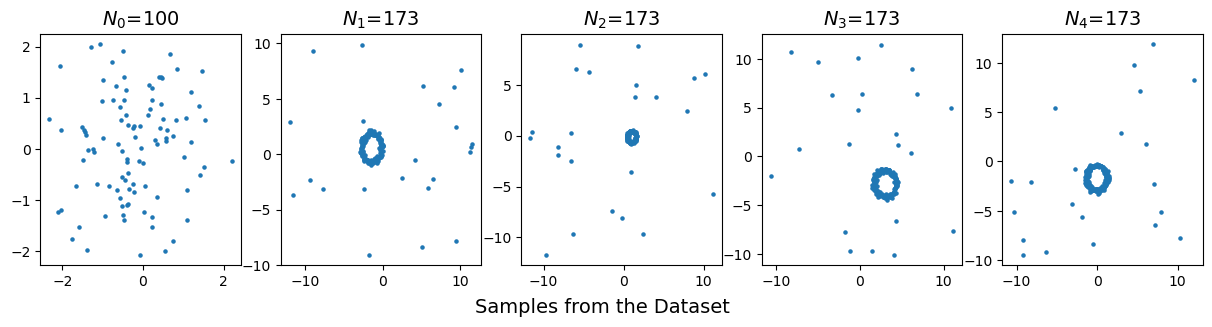

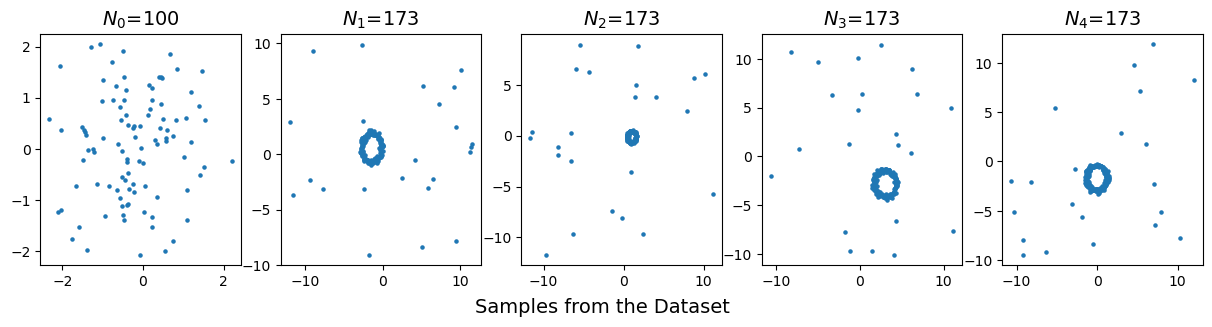

In [121]:
data=torch.load(data_path+'/data.pt')
X=data['X_0']
X_noise=list()
X_noise.append(X[0])
for per in [0.05,0.1]:
    n_noise=int(n*per)
    for i in range(1,M):
        Xi=X[i]
        noise_i=np.random.uniform(low=[-6*2,-6*2],high=[6*2,6*2],size=(n_noise,2))
        X_hat_i=np.concatenate((Xi,noise_i))
        X_noise.append(X_hat_i)
    k=5
    fig,ax=plt.subplots(1,k,figsize=(k*3,3))
    for i in range(k):
        ax[i].scatter(X_noise[i][:,0],X_noise[i][:,1],s=5)
        ax[i].set_title(r'$N_%d$=%d'%(i,X_noise[i].shape[0]),fontsize=14)
    #    ax[i].set_xlim(-6,6)
    #    ax[i].set_ylim(-6,6)
    fig.text(0.5, -0.05, 'Samples from the Dataset', ha='center',fontsize=14)
    plt.show()
    data['X_'+str(per)]=X_noise
torch.save(data,data_path+'/data.pt')

In [245]:
def lot_embedding(X0,Xi,p0,pi):
    C=cost_matrix_d(X0,Xi)
    gamma=ot.emd(p0,pi,C) # exact linear program
    N0,d=X0.shape
    Xi_hat=gamma.dot(Xi)/np.expand_dims(p0,1)
    Ui=Xi_hat-X0
    return Ui

def lot_norm(Ui,p0):
    norm2=np.sum((Ui.T)**2*pi_hat[domain])
    return norm2


# geodesic 
def ot_geodesic(Xi,Xj,alpha):
    Ni=Xi.shape[0]
    Nj=Xj.shape[0]
    pi=np.ones(Ni)/Ni
    pj=np.ones(Nj)/Nj
    C=cost_matrix_d(Xi,Xj)
    gamma=ot.emd(pi,pj,C) # exact linear program
    #N0,d=X0 
    Xj_hat=gamma.dot(Xj)/np.expand_dims(pi,1)
    X_alpha=(1-alpha)*Xi+alpha*Xj_hat
    return X_alpha
    
def lot_geodesic(X0,Ui,Uj,alpha):
    U_alpha=(1-alpha)*Ui+alpha*Uj
    X_alpha=X0+U_alpha
    return X_alpha

def opt_geodesic(Xi,Xj,pi,pj,Lambda,alpha):
    Ni,d=Xi.shape
    Nj=Xj.shape[0]
    cost,gamma,penualty=opt_lp(Xi,Xj,pi,pj,Lambda)
#   cost,plan=opt_pr()
    domain=np.sum(gamma,1)>0
    #domain_d=arange(Ni)[1-domain]
    #domain_c=arange(Ni)[1-domain]
    pj_hat=np.sum(gamma,1) # martial of plan 
    # compute barycentric projetion 
    # (Xi_hat, pi_hat) is the barycentric projection 
    Xj_hat=np.full((Ni,d),np.inf) # barycentric projection
    Xj_hat[domain]=gamma.dot(Xj)[domain]/np.expand_dims(pj_hat,1)[domain]
    #X_alpha=np.full((Ni,d),np.inf)
    X_alpha=(1-alpha)*Xi[domain]+alpha*Xj_hat[domain]
    X_d=Xi[np.invert(domain)]
    #X_c=Xj_hat[domain_c]
    return X_alpha,X_d

def lopt_geodesic(X0,Ui,Uj,alpha):
    n,d=X0.shape
    domain_i=np.sum(Ui,1)<np.inf
    domain_j=np.sum(Uj,1)<np.inf
    domain_ij=np.logical_and(domain_i, domain_j)
    domain_d=np.logical_and(domain_i, np.invert(domain_j)) # domain of desrtoyed point
    domain_c=np.logical_and(np.invert(domain_i), domain_j) # domain of created point 
    #U_alpha=np.full((n,d),np.inf)
    U_alpha=Ui[domain_ij]*(1-alpha)+Uj[domain_ij]*alpha
    #X_alpha=np.full((n,d),np.inf)
    X_alpha=X0[domain_ij]+U_alpha
    X_d=X0[domain_d]+Ui[domain_d]
    X_c=X0[domain_c]+Uj[domain_c]    
    return X_alpha,X_d,X_c

# def lopt_geodesic(X0,Ui,Uj,alpha):
#     n,d=Xi.shape
#     cost,gamma,penualty=opt_lp(X0,Xi,p0,pi,Lambda)
# #   cost,plan=opt_pr()
#     n=X0.shape[0]
#     domain=np.sum(gamma,1)>0
#     pj_hat=np.sum(gamma,1) # martial of plan 
#     # compute barycentric projetion 
#     # (Xi_hat, pi_hat) is the barycentric projection 
#     Xj_hat=np.full((n,d),np.inf) # barycentric projection
#     Xj_hat[domain]=gamma.dot(Xj)[domain]/np.expand_dims(pj_hat,1)[domain]
    
#     # separate barycentric into U_i 
#     X_alpha=Xi_hat*(1-alpha)+Xj*alpha

#     return X_alpha





In [270]:
Ui=U_opt[i]
Uj=U_opt[j]
n,d=X0.shape
alpha=0
domain_i=np.sum(Ui,1)<np.inf
domain_j=np.sum(Uj,1)<np.inf
domain_ij=np.logical_and(domain_i, domain_j)
domain_d=np.logical_and(domain_i, np.invert(domain_j)) # domain of desrtoyed point
domain_c=np.logical_and(np.invert(domain_i), domain_j) # domain of created point 
#U_alpha=np.full((n,d),np.inf)
U_alpha=Ui[domain_ij]*(1-alpha)+Uj[domain_ij]*alpha
#X_alpha=np.full((n,d),np.inf)
X_alpha=X0[domain_ij]+U_alpha
X_d=X0[domain_d]+Ui[domain_d]
X_c=X0[domain_c]+Uj[domain_c]    

In [274]:
np.sum(X_alpha-(X0+U_ot[i]))

1.935777926842519e-14

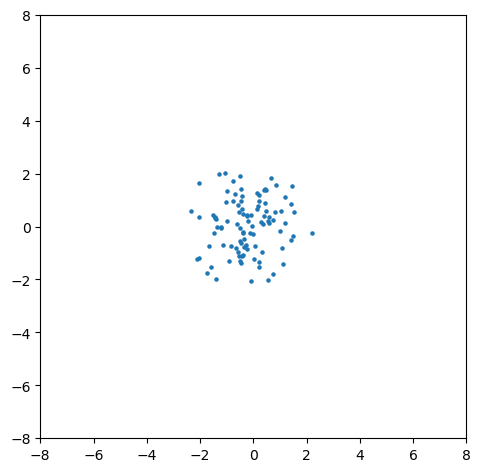

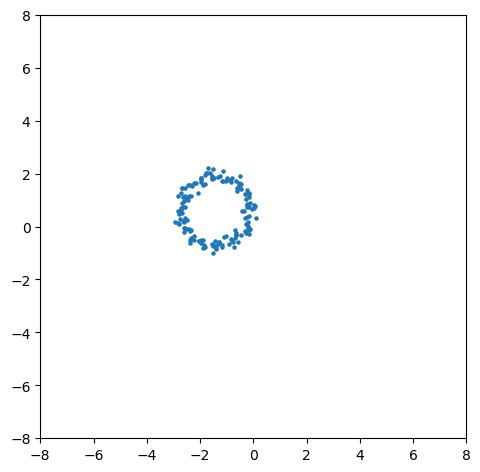

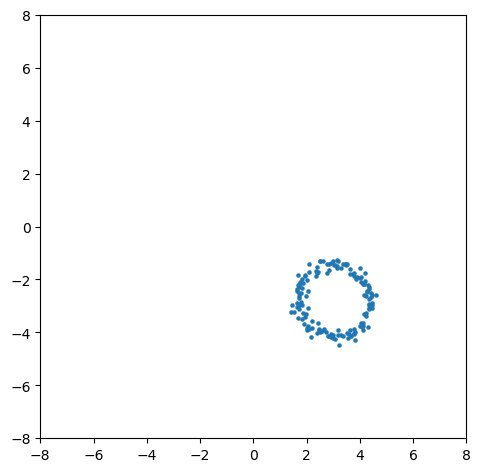

In [246]:
X=data['X_0']
i=1
j=3
Xi=X[i].copy()
Xj=X[j].copy()
X0=X[0].copy()
#print(X0)
label=0
for k in [0,i,j]:
    Xk=X[k].copy()
    name='X'+str(k)
    plt.figure(1, figsize=(5.5,5.5))
    save_path='experiment/geodesic/result/'+str(label)
    plt.scatter(Xk[:,0], Xk[:,1], s=5, alpha=1)
    #plt.set_title('Xi',fontsize=14)
    plt.xlim(-8,8)
    plt.ylim(-8,8)
    plt.savefig(save_path+'/'+name+'.pdf',dpi=200,format='pdf',bbox_inches='tight')
    plt.show()

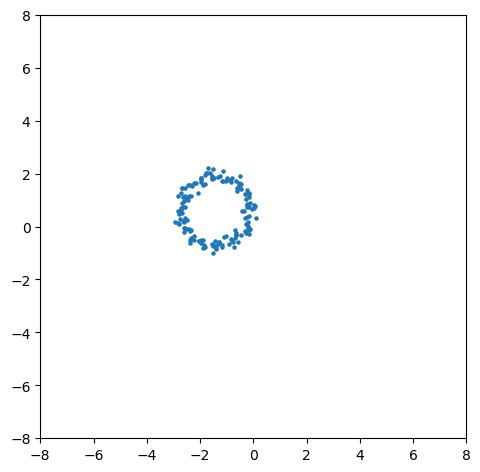

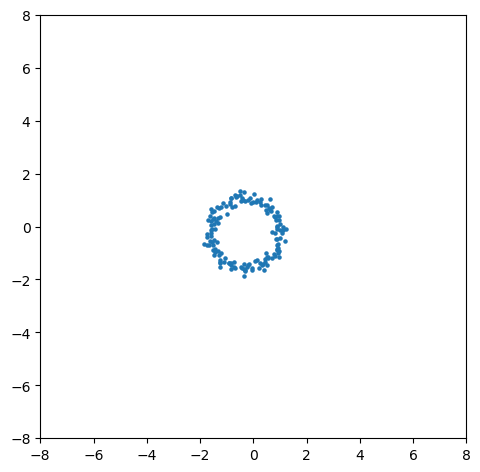

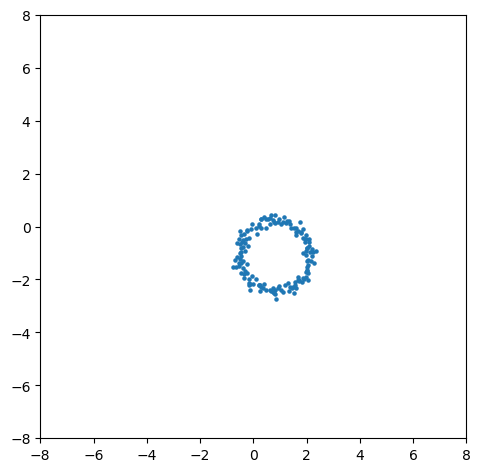

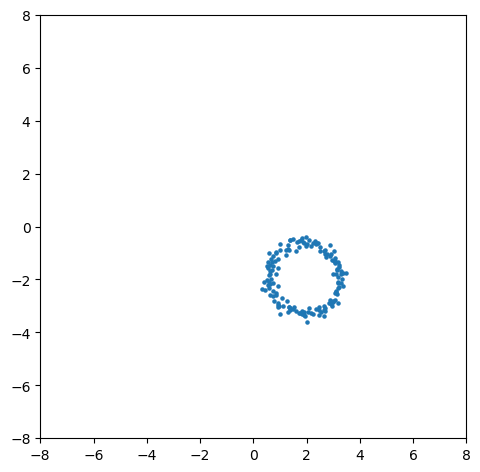

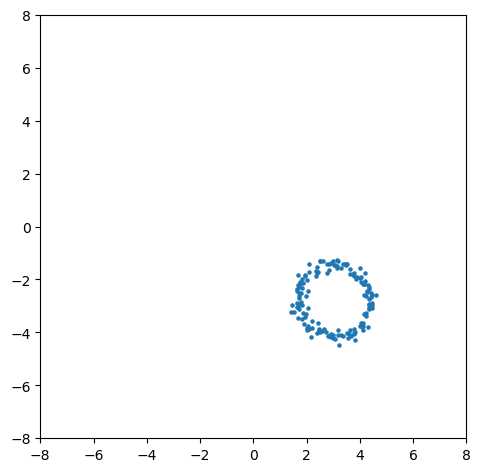

In [247]:
# OT geodesic
k=5
#fig,ax=plt.subplots(1,k,figsize=(k*3,3))
save_path='experiment/geodesic/result/'+str(label)
X_alpha_ot=list()
for alpha in np.linspace(0,1,k):
    X_alpha=ot_geodesic(Xi,Xj,alpha)
    X_alpha_ot.append(X_alpha)
    name='X_ot_alpha='+str(alpha)
    plt.figure(1, figsize=(5.5,5.5))
    plt.scatter(X_alpha[:,0], X_alpha[:,1], s=5, alpha=1)
   
    plt.xlim(-8,8)
    plt.ylim(-8,8)
    plt.savefig(save_path+'/'+name+'.pdf',dpi=200,format='pdf',bbox_inches='tight')
    plt.show()
torch.save(X_alpha_ot,save_path+'/X_alpha_ot.pt')
    

#ax[i].scatter(X_alpha[:,0],X_alpha[:,1],s=5,alpha=1)
#ax[i].set_title(r'$\alpha=$%.02f'%alpha,fontsize=14)
#ax[i].set_xlim(-6,6)
#ax[i].set_ylim(-6,6)    
# fig.text(0.5, -0.05, 'Transport Geodesic, OT', ha='center',fontsize=14)
# plt.show()

In [248]:
#result_path='experiment/geodesic/result/'+str(per)
U_ot=list()
for k in range(M):
    X0=X[0].copy()
    Xk=X[k].copy()
    N0=X0.shape[0]
    Nk=Xk.shape[0]
    p0=np.ones(N0)/N0
    pk=np.ones(Nk)/Nk
    Uk_ot=lot_embedding(X0,Xk,p0,pk)
    U_ot.append(Uk_ot)
torch.save(U_ot,save_path+'/U_ot.pt')
print(save_path+'/U_ot.pt')

U_ot1=torch.load(save_path+'/U_ot.pt')
print(len(U_ot1))
    

experiment/geodesic/result/0/U_ot.pt
100


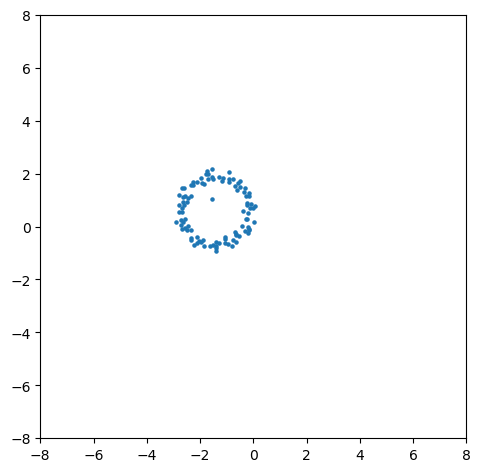

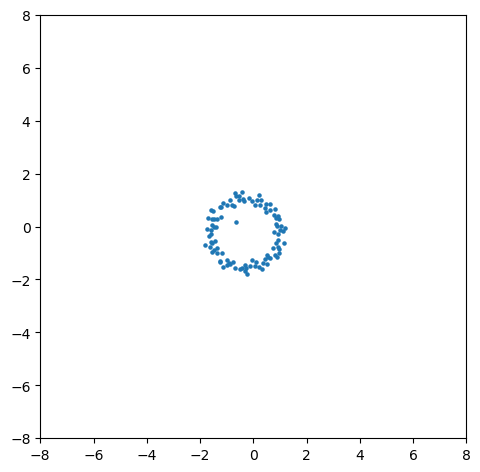

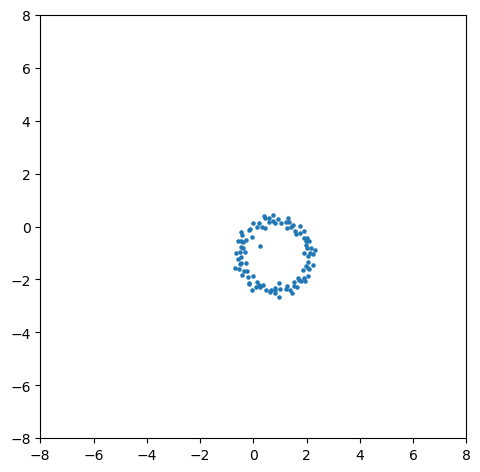

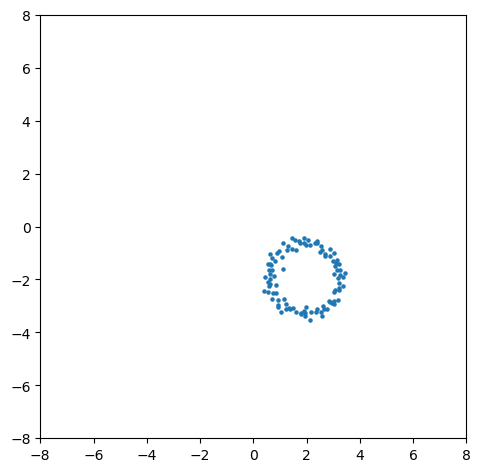

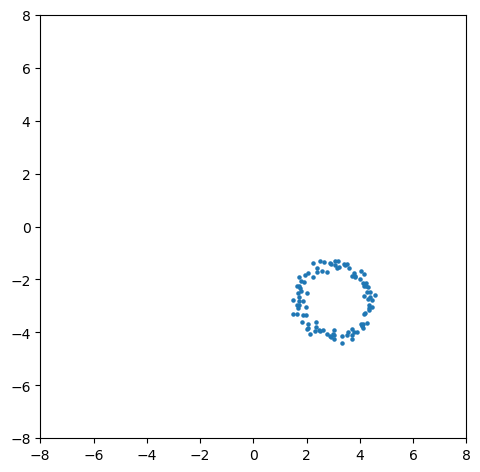

In [249]:
# k=5
# fig,ax=plt.subplots(1,k,figsize=(k*3,3))
# i=1
# j=6
# X0=X[0]
i=1
j=3
k=5
Ui=U_ot[i]
Uj=U_ot[j]
alpha=0
#X_alpha=lot_geodesic(X0,Ui,Uj,alpha)
X_alpha_lot=list()
for alpha in np.linspace(0,1,k):
    X_alpha=lot_geodesic(X0,Ui,Uj,alpha)
    X_alpha_lot.append(X_alpha)
    plt.figure(1, figsize=(5.5,5.5))
    name='X_lot_alpha='+str(alpha)
    plt.scatter(X_alpha[:,0], X_alpha[:,1], s=5, alpha=1)
    plt.xlim(-8,8)
    plt.ylim(-8,8)
    plt.savefig(save_path+'/'+name+'.pdf',dpi=200,format='pdf',bbox_inches='tight')
    plt.show()
torch.save(X_alpha_lot,save_path+'/X_alpha_lot.pt')
# ax[i].scatter(X_alpha[:,0],X_alpha[:,1],s=5,alpha=1)
# ax[i].set_title(r'$\alpha=$%.02f'%alpha,fontsize=14)
# ax[i].set_xlim(-6,6)
# ax[i].set_ylim(-6,6)    
# fig.text(0.5, -0.05, 'Transport Geodesic, LOT', ha='center',fontsize=14)
# plt.show()

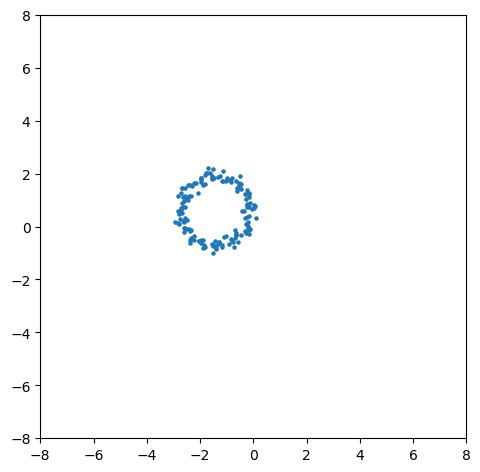

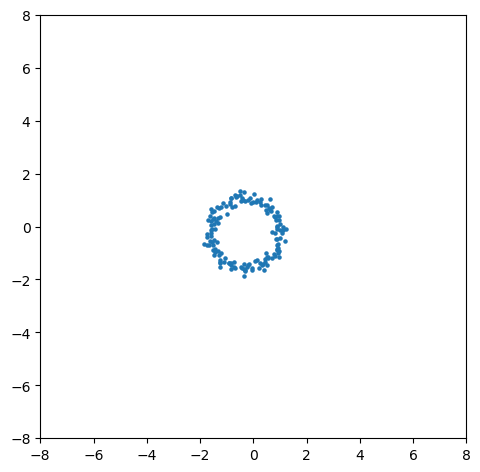

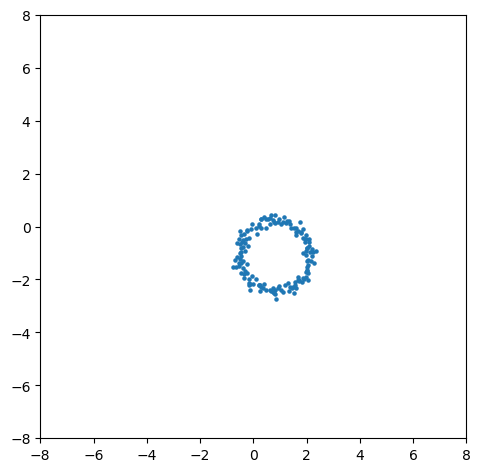

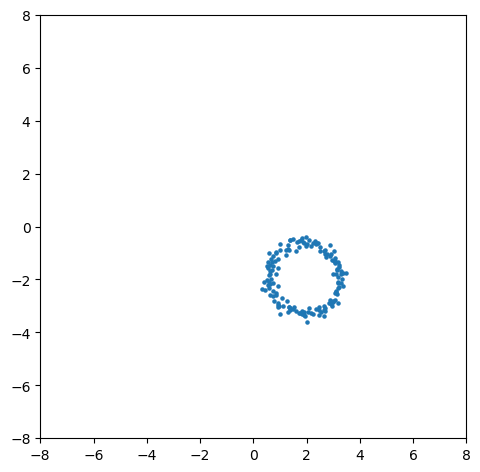

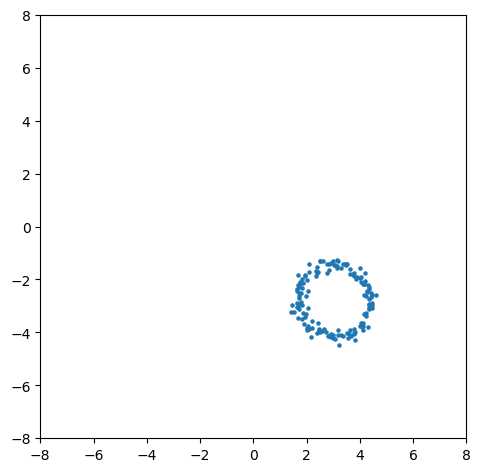

In [252]:
k=5
# fig,ax=plt.subplots(1,k,figsize=(k*3,3))
i=1
j=3
# X0=X[0]
Xi=X[i].copy()
Xj=X[j].copy()
Ni=Xi.shape[0]
Nj=Xj.shape[0]
pi=np.ones(Ni)/Ni
pj=np.ones(Nj)/Nj
Lambda=40.0

X_alpha_opt=list()
for alpha in np.linspace(0,1,k):
    X_alpha,X_d=opt_geodesic(Xi,Xj,pi,pj,Lambda,alpha)
    X_alpha_opt.append((X_alpha,X_d))
    plt.figure(1, figsize=(5.5,5.5))
    name='X_opt_alpha='+str(alpha)
    plt.scatter(X_alpha[:,0], X_alpha[:,1], s=5, alpha=1)
    plt.scatter(X_d[:,0], X_d[:,1],c='b',marker='^', s=5*(1-alpha), alpha=1)
    plt.xlim(-8,8)
    plt.ylim(-8,8)
    plt.savefig(save_path+'/'+name+'.pdf',dpi=200,format='pdf',bbox_inches='tight')
    plt.show()

torch.save(X_alpha_opt,save_path+'/X_opt_alpha.pt')
    # X_alpha=opt_geodesic(Xi,Xj,pi,pj,Lambda,alpha)
    # ax[i].scatter(X_alpha[:,0],X_alpha[:,1],s=5,alpha=1)
    # ax[i].set_title(r'$\alpha=$%.02f'%alpha,fontsize=14)
    # ax[i].set_xlim(-8,8)
    # ax[i].set_ylim(-8,8)

#i=k
#ax[i].scatter(X_alpha[:,0],X_alpha[:,1],s=5,alpha=1)
#ax[i].set_title(r'$\alpha=$%.02f'%alpha,fontsize=14)
#ax[i].set_xlim(-6,6)
#ax[i].set_ylim(-6,6)    
#fig.text(0.5, -0.05, 'Transport Geodesic, OPT', ha='center',fontsize=14)
#plt.show()

In [243]:
Ni,d=Xi.shape
Nj=Xj.shape[0]
cost,gamma,penualty=opt_lp(Xi,Xj,pi,pj,Lambda)
#   cost,plan=opt_pr()
domain=np.sum(gamma,1)>0
#domain_d=arange(Ni)[1-domain]
#domain_c=arange(Ni)[1-domain]
pj_hat=np.sum(gamma,1) # martial of plan 
1-domain

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [276]:
U_opt=list()
for k in range(M):
    X0=X[0].copy()
    Xk=X[k].copy()
    N0=X0.shape[0]
    Nk=Xk.shape[0]
    p0=np.ones(N0)/N0
    pk=np.ones(Nk)/Nk
    Uk,pk_hat,mass_p0,mass_pk=lopt_embedding(X0,Xk,p0,pk,Lambda)
    U_opt.append(Ui)
torch.save(U_opt,save_path+'/U_ot.pt')
print(save_path+'/U_opt.pt')


experiment/geodesic/result/0/U_opt.pt


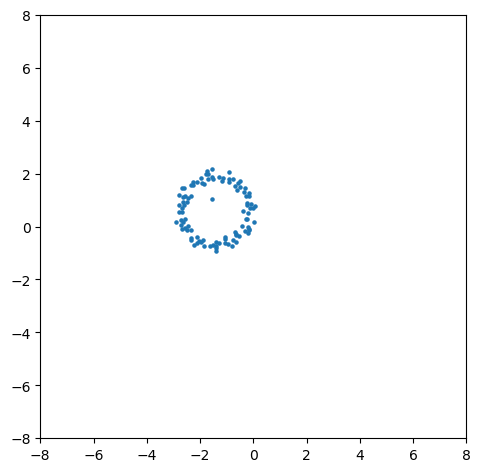

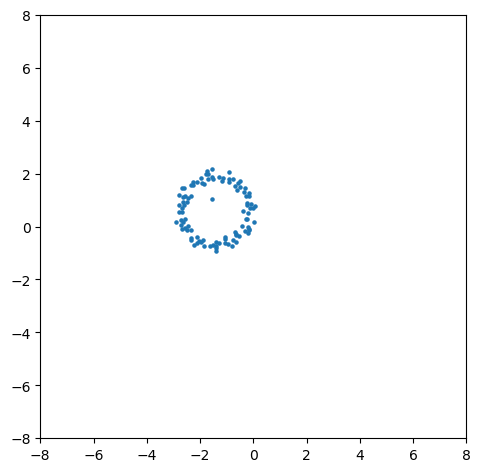

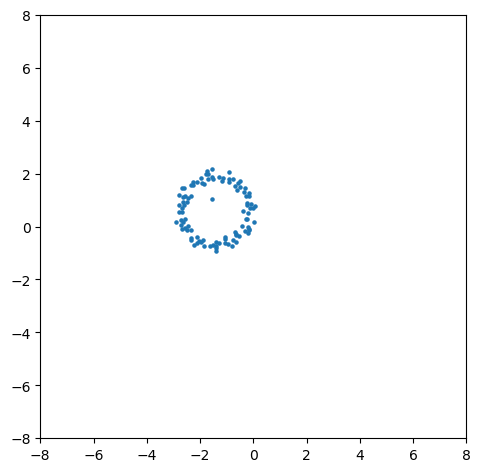

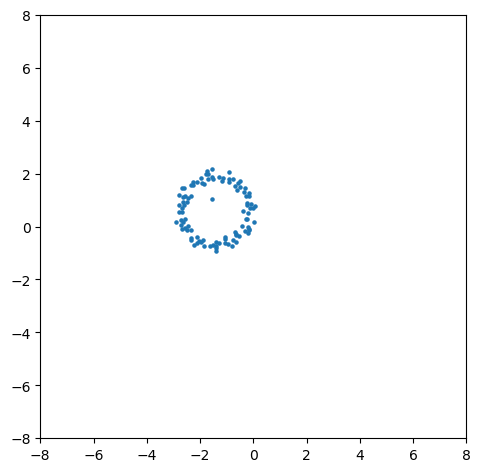

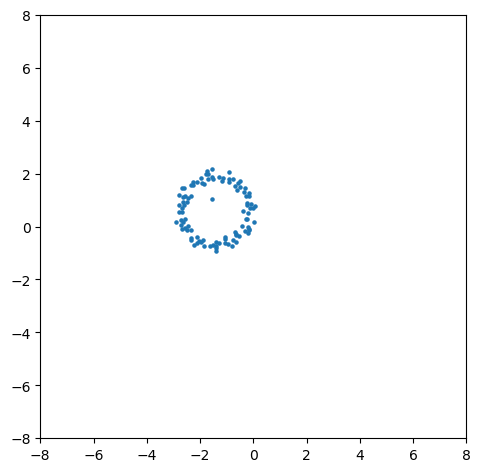

In [277]:
k=5
#fig,ax=plt.subplots(1,k,figsize=(k*3,3))
i=1
j=3
X0=X[0]
Ui=U_opt[i]
Uj=U_opt[j]


Lambda=40.0
X_alpha_lopt=list()
for alpha in np.linspace(0,1,k):
    X_alpha,X_d,X_c=lopt_geodesic(X0,Ui,Uj,alpha)
    X_alpha_lopt.append((X_alpha,X_d,X_c))
    plt.figure(1, figsize=(5.5,5.5))
    name='X_lopt_alpha='+str(alpha)
    plt.scatter(X_alpha[:,0], X_alpha[:,1], s=5, alpha=1)
    plt.scatter(X_d[:,0], X_d[:,1],color='b',marker='^', s=5*(1-alpha), alpha=1)
    plt.scatter(X_c[:,0], X_c[:,1],color='b',marker='^', s=5*(alpha), alpha=1)
    
    plt.xlim(-8,8)
    plt.ylim(-8,8)
    plt.savefig(save_path+'/'+name+'.pdf',dpi=200,format='pdf',bbox_inches='tight')
    plt.show()
    
# for i,alpha in enumerate(np.linspace(0,1,k)):
#     X_alpha,X_d,X_c=lopt_geodesic(X0,Ui,Uj,alpha)
#     ax[i].scatter(X_alpha[:,0],X_alpha[:,1],s=5,alpha=1)
#     ax[i].set_title(r'$\alpha=$%.02f'%alpha,fontsize=14)
#     ax[i].set_xlim(-8,8)
#     ax[i].set_ylim(-8,8)
# i=k
# #ax[i].scatter(X_alpha[:,0],X_alpha[:,1],s=5,alpha=1)
# #ax[i].set_title(r'$\alpha=$%.02f'%alpha,fontsize=14)
# #ax[i].set_xlim(-6,6)
# #ax[i].set_ylim(-6,6)    
# fig.text(0.5, -0.05, 'Transport Geodesic, LOPT', ha='center',fontsize=14)
# plt.show()